In [14]:
import pandas as pd
import time
from time import perf_counter
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
X_train = pd.read_csv('data/X_train_tfidf.csv', index_col=0) 
X_test = pd.read_csv('data/X_test_tfidf.csv', index_col=0) 
X_val = pd.read_csv('data/X_val_tfidf.csv', index_col=0) 
y_train = pd.read_csv('data/y_train.csv', index_col=0) 
y_test = pd.read_csv('data/y_test.csv', index_col=0)
y_val = pd.read_csv('data/y_val.csv', index_col=0)

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

In [5]:
X_train.head()

,index,year,cylinders,odometer,lat,long,posting_weekday,posting_month,posting_year,condition_excellent,...,d_wheel,d_white,d_window,d_wiper,d_without,d_won’t,d_work,d_year,d_youdisclaimer,d_✅
0,322098,2017.0,8,74863.0,45.519861,-122.434111,3,11,2020,0,...,0.067461,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,344532,2019.0,4,4142.0,41.400000,-75.660000,1,11,2020,0,...,0.000000,0.0,0.0,0.0,0.059981,0.039182,0.027457,0.0,0.039394,0.0
2,13565,2013.0,4,61674.0,34.620000,-112.420000,3,11,2020,0,...,0.000000,0.0,0.0,0.0,0.075885,0.049570,0.034738,0.0,0.049839,0.0
3,334734,2017.0,6,26451.0,40.270000,-76.880000,4,11,2020,0,...,0.000000,0.0,0.0,0.0,0.075588,0.049377,0.034602,0.0,0.049645,0.0
4,36265,2019.0,4,4161.0,33.779214,-84.411811,1,12,2020,0,...,0.000000,0.0,0.0,0.0,0.073911,0.048281,0.033834,0.0,0.048543,0.0


In [6]:
y_train.head()

322098    61900
344532    17990
13565     13590
334734    30990
36265     33990
Name: price, dtype: int64

In [7]:
#dropping description column
X_train.drop(['index'], axis = 1, inplace = True)
X_val.drop(['index'], axis = 1, inplace = True)
X_test.drop(['index'], axis = 1, inplace = True)

In [82]:
index = X_train.columns
model_score = pd.DataFrame(columns=('r2', 'mae','rmse', 'mse', 'run_time' ))

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [80]:
#analyzing shape to find if there any discrepancy before starting to model
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}') 
print(f'y_test Shape: {y_test.shape}') 
print(f'X_val Shape: {X_val.shape}') 
print(f'y_val Shape: {y_val.shape}')

X_train Shape: (204156, 795)
y_train Shape: (204156,)
X_test Shape: (63799, 795)
y_test Shape: (63799,)
X_val Shape: (51039, 795)
y_val Shape: (51039,)


In [10]:
from sklearn.preprocessing import StandardScaler
# Scaling data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.metrics import r2_score
from sklearn import metrics
import math 

In [84]:
t0 = perf_counter()
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_val)


lr_r2 = lr_model.score(X_val,y_val)
lr_mse = mean_squared_error(y_val, lr_predict)
lr_mae = mean_absolute_error(y_val, lr_predict)
lr_rmse = sqrt(mean_squared_error(y_val, lr_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'mae':[lr_mae],'rmse':[lr_rmse], 'mse': [lr_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Linear Regression tf-idf']))


# Evaluate
print(f"Linear Regression R2 score for train set: {lr_model.score(X_train, y_train)}")
print(f"Linear Regression R2 score for val set:  {lr_model.score(X_val,y_val)}")
print(f"Linear Regression MAE for val set: {lr_mae}")
print(f"Linear Regression RMSE for val set: {lr_rmse}" )
print(f"Linear Regression MSE for val set: {lr_mse}")
print(f"Linear Regression runtime: {time_taken/60}")

Linear Regression R2 score for train set: 0.8237887198028895
Linear Regression R2 score for val set:  -4.2444169250460365e+17
Linear Regression MAE for val set: 36642659203.09941
Linear Regression RMSE for val set: 8278240120885.983
Linear Regression MSE for val set: 6.852925949904639e+25
Linear Regression runtime: 0.18272054499999893


In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

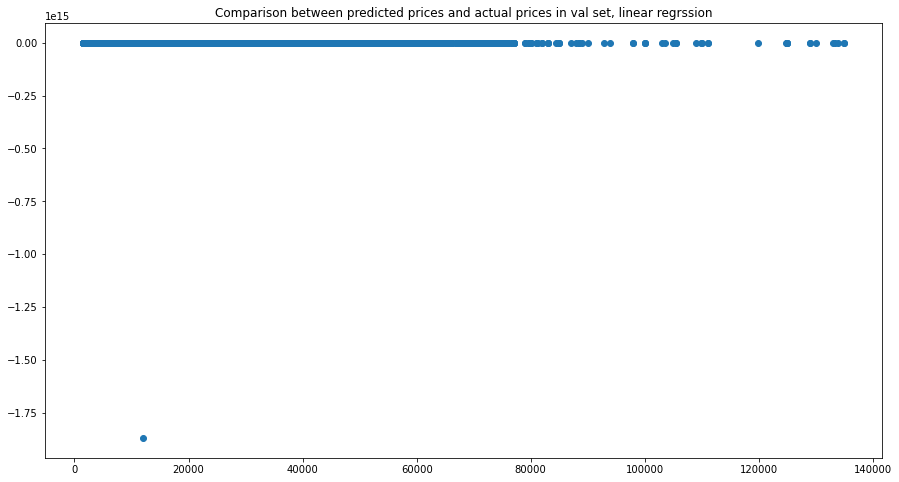

In [17]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Comparison between predicted prices and actual prices in val set, linear regrssion')
plt.scatter(y_val, lr_predict)

In [18]:
lr_model.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [19]:
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [22]:
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
cachedir=mkdtemp()

my_pipeline = Pipeline(steps=[('model', LinearRegression())], memory=cachedir )

In [23]:
estimator=my_pipeline
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'model', 'model__copy_X', 'model__fit_intercept', 'model__n_jobs', 'model__normalize'])

In [24]:
lr_params = {"model__fit_intercept": [True, False],
             "model__copy_X":[True, False]
             }

In [25]:
rs=RandomizedSearchCV(estimator, lr_params, cv=5, n_jobs=-1, verbose=20, n_iter=100)
gs=GridSearchCV(estimator, lr_params, cv=5, n_jobs=-1, verbose=20)

In [26]:
fitted_rs=rs.fit(X_train,y_train)

C:\Users\zesha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:  7.0min remaining: 13.1min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:  7.1min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  7.6min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:  8.4min remaining:  4.5min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  8.6min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  8.9min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.1min finished


In [27]:
fitted_rs.best_estimator_

Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpgcyy8_pw',
         steps=[('model', LinearRegression(fit_intercept=False))])

In [28]:
print(f"Randomized Search CV with k folds of 5 R2 on train set: {fitted_rs.score(X_train, y_train)}")
print(f"Randomized Search CV with k folds of 5 R2 on test set: {fitted_rs.score(X_val, y_val)}")

Randomized Search CV with k folds of 5 R2 on train set: -1.0363363830362893
Randomized Search CV with k folds of 5 R2 on test set: -2.416901251017641e+23


In [30]:
fitted_gs=gs.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:  5.1min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done   9 out of  20 | elapsed:  5.5min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  5.6min remaining:  4.6min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:  6.0min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:  6.5min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  6.5min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.0min finished


In [31]:
fitted_gs.best_estimator_

Pipeline(memory='C:\\Users\\zesha\\AppData\\Local\\Temp\\tmpgcyy8_pw',
         steps=[('model', LinearRegression(fit_intercept=False))])

In [32]:
print(f"R2 on train set: {fitted_gs.score(X_train, y_train)}")
print(f"R2 on test set: {fitted_gs.score(X_val, y_val)}")

R2 on train set: -1.0363363830362893
R2 on test set: -2.416901251017641e+23


In [85]:
t0 = perf_counter()
lr_model_gs = LinearRegression(fit_intercept=False)
lr_model_gs.fit(X_train,y_train)
lr_gs_predict = lr_model_gs.predict(X_val)


lr_gs_r2 = lr_model_gs.score(X_val,y_val)
lr_gs_mse = mean_squared_error(y_val, lr_gs_predict)
lr_gs_mae = mean_absolute_error(y_val, lr_gs_predict)
lr_gs_rmse = sqrt(mean_squared_error(y_val, lr_gs_predict))
t1 = perf_counter()
time_taken = t1 - t0
model_score = model_score.append(pd.DataFrame({'r2':[lr_gs_r2], 'mae':[lr_gs_mae],'rmse':[lr_gs_rmse], 'mse': [lr_gs_mse],
                                               'run_time':[(time_taken)/60]} ,index = ['Linear Regression tuned with GridSearchCV kfolds=5']))


# Evaluate
print(f"Linear Regression GridSearchCV k-folds =5 R2 score for train set: {lr_model_gs.score(X_train, y_train)}")
print(f"Linear Regression GridSearchCV k-folds =5 R2 score for val set:  {lr_model_gs.score(X_val,y_val)}")
print(f"Linear Regression GridSearchCV k-folds =5 MAE for val set: {lr_gs_mae}")
print(f"Linear Regression GridSearchCV k-folds =5 RMSE for val set: {lr_gs_rmse}" )
print(f"Linear Regression GridSearchCV k-folds =5 MSE for val set: {lr_gs_mse}")
print(f"Linear Regression runtime: {time_taken/60}")

Linear Regression GridSearchCV k-folds =5 R2 score for train set: -1.0363363830362893
Linear Regression GridSearchCV k-folds =5 R2 score for val set:  -2.416901251017641e+23
Linear Regression GridSearchCV k-folds =5 MAE for val set: 27650779301329.016
Linear Regression GridSearchCV k-folds =5 RMSE for val set: 6246812259427129.0
Linear Regression GridSearchCV k-folds =5 MSE for val set: 3.902266340452907e+31
Linear Regression runtime: 0.17916411999999582


In [86]:
model_score

,r2,mae,rmse,mse,run_time
Linear Regression tf-idf,-4.244417e+17,3.664266e+10,8.278240e+12,6.852926e+25,0.182721
Linear Regression tuned with GridSearchCV kfolds=5,-2.416901e+23,2.765078e+13,6.246812e+15,3.902266e+31,0.179164


In [87]:
model_score.to_csv('data/model_scores.csv', mode='a', index=False, header=False)